# Developing an AI for Hand Gesture Recognition

You are working for a gaming company developing interactive AI-powered games. Your task is to create a hand gesture recognition model to play a game of Rock, Paper, Scissors against human players. The model should be accurate and able to predict gestures from images in real-time.

The Rock, Paper, Scissors dataset, available in TensorFlow Datasets, contains RGB images of hands showing rock, paper, and scissors gestures. Your goal is to create a model using transfer learning and test its real-time application potential.

**Title: Transfer Learning with EfficientNetB0 for Image Classification**

This code demonstrates how to use EfficientNetB0, a pre-trained deep learning model, for image classification tasks. EfficientNetB0 is a lightweight version of EfficientNet, known for its balance between speed and accuracy. This model has been trained on the ImageNet dataset and can be fine-tuned to classify new datasets, such as the "rock, paper, scissors" dataset.

In [ ]:
#importing necessary libraries

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import EfficientNetB0, VGG16



**Loading and Visualization of Dataset**

This code demonstrates how to load and visualize the Rock, Paper, Scissors dataset using TensorFlow Datasets (TFDS). The dataset contains images of the three objects: rock, paper, and scissors.

The code performs the following tasks:

Dataset Loading: It loads the "rock_paper_scissors" dataset using tfds.load, which includes both the training and test splits, along with metadata like class names and number of examples.

Dataset Information: It prints information about the dataset, including the number of training and test samples, as well as the class names ("rock", "paper", and "scissors").

Visualizing Sample Images: It displays a selection of 10 sample images from the training dataset, where each image is labeled with its respective class. This helps visually understand the dataset and the types of images it contains.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.774FLJ_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.774FLJ_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.
Dataset Info: tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir=PosixGPath('/tmp/tmpxaqmvtnvtfds'),
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock

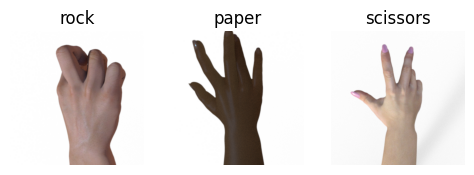

In [ ]:
# Load Rock, Paper, Scissors Dataset
dataset, info = tfds.load('rock_paper_scissors', as_supervised=True, with_info=True)

# Split Dataset into Train and Test
train_dataset = dataset['train']
test_dataset = dataset['test']

# Print Dataset Information
print("Dataset Info:", info)
print(f"Number of training examples: {info.splits['train'].num_examples}")
print(f"Number of test examples: {info.splits['test'].num_examples}")
print("Classes:", info.features['label'].names)

# Visualize Sample Images
plt.figure(figsize=(10, 5))
for example in train_dataset.take(10):
    image, label = example
    plt.subplot(2, 5, label.numpy() + 1)
    plt.imshow(image)
    plt.title(info.features['label'].names[label.numpy()])
    plt.axis('off')
plt.show()

**Data Preprocessing**

This code defines a function load_and_preprocess_data() to load and preprocess the Rock, Paper, Scissors dataset for training a model. The function performs the following steps:

Loading the Dataset: It loads the dataset using TensorFlow Datasets (TFDS), extracting both the training and test splits.

Preprocessing:
The images are normalized by scaling pixel values to the range [0, 1] (tf.cast(image, tf.float32) / 255.0).
The images are resized to a standard size of 224x224 pixels using tf.image.resize() to match the input size required by most deep learning models like EfficientNetB0.

Shuffling and Batching: The training data is shuffled to ensure the model sees a random order of data during training. Then, both training and testing datasets are batched with a batch size of 32.

Returning Data: The function returns the processed training and test datasets, along with the number of classes in the dataset (num_classes).

In [ ]:
import tensorflow as tf  # Import TensorFlow

# Preprocessing function
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize the image
    image = tf.image.resize(image, (224, 224))  # Resize the image to 224x224
    return image, label

# Apply preprocessing to the datasets
train_dataset = train_dataset.map(preprocess).shuffle(1000).batch(32)
test_dataset = test_dataset.map(preprocess).batch(32)

# Assuming `num_classes` is defined elsewhere
# return train_dataset, test_dataset, num_classes  # If this is in a function


In [ ]:
def load_and_preprocess_data():
    """Load and preprocess the Rock Paper Scissors dataset"""
    # Load dataset
    dataset, info = tfds.load('rock_paper_scissors', with_info=True, as_supervised=True)
    train_dataset, test_dataset = dataset['train'], dataset['test']

    # Get number of classes and examples
    num_classes = info.features['label'].num_classes

    # Preprocessing function
    def preprocess(image, label):
        image = tf.cast(image, tf.float32) / 255.0
        image = tf.image.resize(image, (224, 224))
        return image, label

    # Apply preprocessing
    train_dataset = train_dataset.map(preprocess).shuffle(1000).batch(32)
    test_dataset = test_dataset.map(preprocess).batch(32)

    return train_dataset, test_dataset, num_classes


**Transfer Learning Model Implementation**

This function create_model(num_classes) defines a transfer learning model using the EfficientNetB0 architecture. The key steps are:

Base Model (EfficientNetB0): The model uses a pre-trained EfficientNetB0 as the base model, which is loaded with weights from ImageNet. The top (fully connected) layers are excluded by setting include_top=False, and the input shape is set to (224, 224, 3) to match the image size.

Freezing the Base Model: The base model is frozen (base_model.trainable = False), meaning its weights won't be updated during training, and only the top layers will be trained.

Top Layers:

GlobalAveragePooling2D(): Reduces the spatial dimensions of the feature maps, making the output suitable for dense layers.
Dropout(0.2): A dropout layer with 20% dropout rate is added to prevent overfitting.
Dense(128, activation='relu'): A dense layer with 128 units and ReLU activation function.
Dropout(0.2): Another dropout layer to further reduce overfitting.
Dense(num_classes, activation='softmax'): The final dense layer with units equal to num_classes, using a softmax activation to output class probabilities.
This architecture leverages the powerful pre-trained EfficientNetB0 model for feature extraction while fine-tuning the top layers for the specific classification task.

In [ ]:
# Model Creation
def create_model(num_classes):
    """Create transfer learning model using EfficientNetB0"""
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the base model
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

** Model Evaluation and Optimization**

The train_model() function is used to train and evaluate the model. The key steps are:

Model Compilation:

The model is compiled with the Adam optimizer, which is efficient for training deep learning models.
Sparse categorical crossentropy is used as the loss function since it's a multi-class classification problem with integer labels.
Accuracy is set as the metric to evaluate model performance during training.

Model Training:

The fit() method trains the model on the train_dataset for 10 epochs.
Validation: The model is evaluated on the test_dataset after each epoch to monitor its performance on unseen data.
Early Stopping: A callback is used to stop training early if the validation accuracy doesn't improve for 3 consecutive epochs, preventing overfitting. It restores the model's best weights after training halts.
Return History: The function returns the training history, which contains metrics like loss and accuracy for both training and validation sets over the epochs.

In [ ]:
# Training and Evaluation
def train_model(model, train_dataset, test_dataset):
    """Train the model and return training history"""
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        train_dataset,
        epochs=10,
        validation_data=test_dataset,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(
                monitor='val_accuracy',
                patience=3,
                restore_best_weights=True
            )
        ]
    )

    return history


In [ ]:
def plot_training_history(history):
    """Plot training and validation metrics"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy plot
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Loss plot
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    return fig

In [ ]:
def plot_confusion_matrix(model, test_dataset):
    """Generate and plot confusion matrix"""
    # Get predictions
    true_labels = []
    predictions = []

    for images, labels in test_dataset:
        true_labels.extend(labels.numpy())
        batch_predictions = model.predict(images)
        predictions.extend(np.argmax(batch_predictions, axis=1))

    # Create confusion matrix
    cm = confusion_matrix(true_labels, predictions)

    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    return plt.gcf()


**Deployment and Predictions on Test Set**

This script combines multiple steps of the machine learning workflow for a "Rock, Paper, Scissors" classification task:

Function predict_gesture(model, image):

Takes a pre-trained model and an input image to predict the gesture.
Preprocessing:
Normalizes the image to [0, 1] range.
Resizes it to (224, 224) to match the model's input size.
Adds a batch dimension to prepare it for prediction.
Prediction:
Uses the model to predict class probabilities.
Identifies the predicted class and its confidence.
Maps the predicted index to the corresponding class label (Rock, Paper, or Scissors).
Returns the predicted label and confidence.
Main Execution:

Load and Preprocess Data: Calls load_and_preprocess_data() to load and prepare the dataset.
Create and Train Model:
Builds the model using create_model(num_classes).
Trains the model using train_model(), which includes validation and early stopping.
Visualizations:
plot_training_history(history): Visualizes training and validation metrics.
plot_confusion_matrix(model, test_dataset): Displays the confusion matrix to assess model performance.
Save Model: Saves the trained model to a file (rock_paper_scissors_model.h5) for future use.
This script automates the end-to-end pipeline, from data preparation to model training, evaluation, and saving, making it ready for deployment and predictions.

In [ ]:
def predict_gesture(model, image):
    """Make prediction on a single image"""
    # Preprocess image
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, (224, 224))
    image = tf.expand_dims(image, 0)

    # Make prediction
    prediction = model.predict(image)
    class_idx = np.argmax(prediction[0])
    confidence = prediction[0][class_idx]

    classes = ['Rock', 'Paper', 'Scissors']
    return classes[class_idx], confidence


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.3135 - loss: 1.1070 - val_accuracy: 0.3333 - val_loss: 1.0991
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.3304 - loss: 1.1000 - val_accuracy: 0.3333 - val_loss: 1.1022
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.3356 - loss: 1.1035 - val_accuracy: 0.3333 - val_loss: 1.0988
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.3406 - loss: 1.0980 - val_accuracy: 0.3333 - val_loss: 1.0990
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


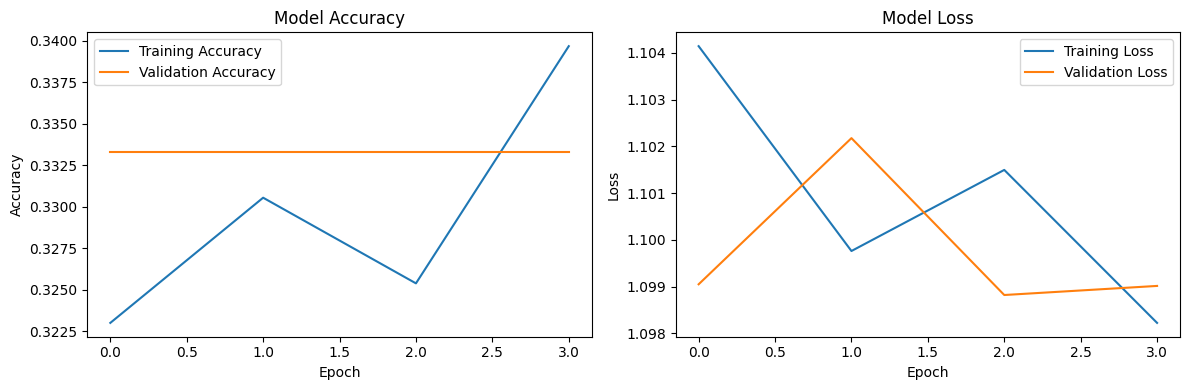

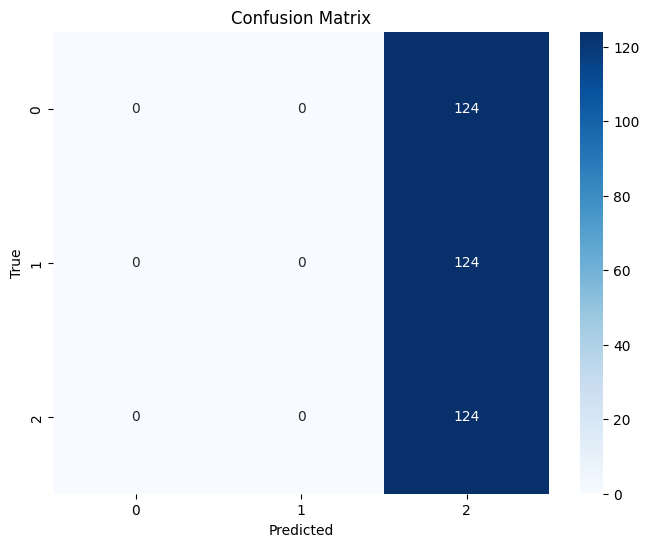

In [ ]:
# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    train_dataset, test_dataset, num_classes = load_and_preprocess_data()

    # Create and train model
    model = create_model(num_classes)
    history = train_model(model, train_dataset, test_dataset)

    # Generate visualizations
    plot_training_history(history)
    plot_confusion_matrix(model, test_dataset)

    # Save model
    model.save('rock_paper_scissors_model.h5')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 61s 494ms/step - accuracy: 0.5519 - loss: 0.9500 - val_accuracy: 0.8656 - val_loss: 0.4426 - learning_rate: 0.0010
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 35s 150ms/step - accuracy: 0.9412 - loss: 0.2822 - val_accuracy: 0.9489 - val_loss: 0.2326 - learning_rate: 0.0010
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 155ms/step - accuracy: 0.9830 - loss: 0.1166 - val_accuracy: 0.9597 - val_loss: 0.1396 - learning_rate: 0.0010
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 168ms/step - accuracy: 0.9933 - loss: 0.0664 - val_accuracy: 0.9543 - val_loss: 0.1118 - learning_rate: 0.0010
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.9967 - loss: 0.0439 - val_accuracy: 0.9435 - val_loss: 0.1111 - learning_rate: 0.0010
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - accuracy: 0.9965 - loss: 0.0332 - val_accuracy: 0.9435 - val_loss: 0.1249 - learning_rate: 0.0010
Epoch 7/10
79/79 ━━━━━━━━━━━━━━

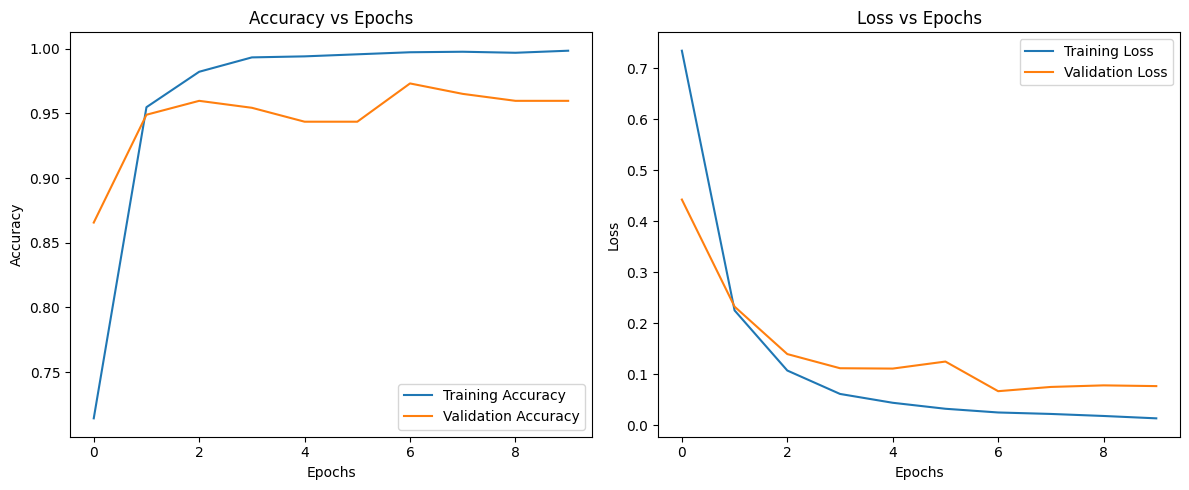

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Data Loading and Preprocessing
def load_and_preprocess_data():
    """Load and preprocess the Rock Paper Scissors dataset"""
    # Load dataset
    dataset, info = tfds.load('rock_paper_scissors', with_info=True, as_supervised=True)
    train_dataset, test_dataset = dataset['train'], dataset['test']

    # Preprocessing function
    def preprocess(image, label):
        image = tf.cast(image, tf.float32) / 255.0
        image = tf.image.resize(image, (224, 224))
        return image, label

    # Apply preprocessing
    train_dataset = train_dataset.map(preprocess).shuffle(1000).batch(32)
    test_dataset = test_dataset.map(preprocess).batch(32)

    # Extract the number of classes
    num_classes = info.features['label'].num_classes
    return train_dataset, test_dataset, num_classes

# Model Creation
def create_model(num_classes):
    """Create a transfer learning model using EfficientNetB0"""
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze the base model initially

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Training Function
def train_model(model, train_dataset, test_dataset, epochs=10):
    """Train the model with early stopping and learning rate reduction"""
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy', patience=5, restore_best_weights=True
    )

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1
    )

    history = model.fit(
        train_dataset,
        validation_data=test_dataset,
        epochs=epochs,
        callbacks=[early_stopping, reduce_lr]
    )
    return history

# Visualize Training Metrics
def plot_training_history(history):
    """Plot training and validation accuracy/loss"""
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Load and preprocess data
    train_dataset, test_dataset, num_classes = load_and_preprocess_data()

    # Create the model
    model = create_model(num_classes)

    # Train the model
    history = train_model(model, train_dataset, test_dataset, epochs=10)

    # Visualize the training process
    plot_training_history(history)

    # Save the model
    model.save('rock_paper_scissors_model.keras')


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 103s 811ms/step - accuracy: 0.3392 - loss: 1.1044 - val_accuracy: 0.3333 - val_loss: 1.0986 - learning_rate: 0.0010
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 59s 497ms/step - accuracy: 0.3597 - loss: 1.1003 - val_accuracy: 0.3333 - val_loss: 1.1001 - learning_rate: 0.0010
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.3382 - loss: 1.1001
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 492ms/step - accuracy: 0.3383 - loss: 1.1001 - val_accuracy: 0.3333 - val_loss: 1.1036 - learning_rate: 0.0010
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 61s 534ms/step - accuracy: 0.3446 - loss: 1.0989 - val_accuracy: 0.3333 - val_loss: 1.0988 - learning_rate: 5.0000e-04
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.3477 - loss: 1.0976
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 531ms/step - accuracy: 0.3476 - loss: 1

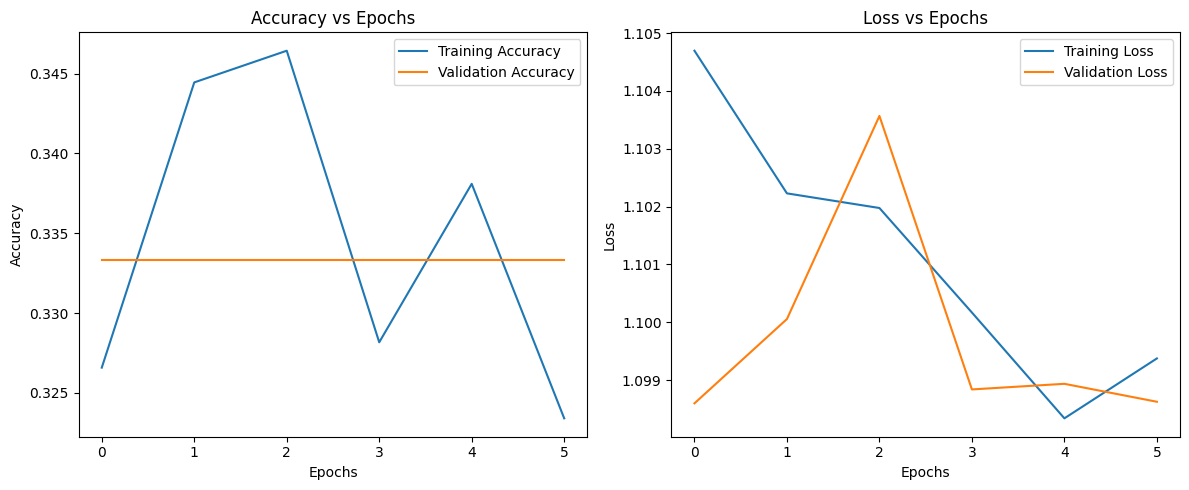

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 115s 876ms/step - accuracy: 0.3441 - loss: 1.1547 - val_accuracy: 0.3333 - val_loss: 1.1309 - learning_rate: 1.0000e-04
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 62s 537ms/step - accuracy: 0.3430 - loss: 1.1088 - val_accuracy: 0.3333 - val_loss: 1.1107 - learning_rate: 1.0000e-04
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 81s 545ms/step - accuracy: 0.3231 - loss: 1.1120 - val_accuracy: 0.3333 - val_loss: 1.1039 - learning_rate: 1.0000e-04
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 61s 538ms/step - accuracy: 0.3353 - loss: 1.1028 - val_accuracy: 0.3333 - val_loss: 1.1004 - learning_rate: 1.0000e-04
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 534ms/step - accuracy: 0.3327 - loss: 1.1043 - val_accuracy: 0.3333 - val_loss: 1.0986 - learning_rate: 1.0000e-04
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 79s 498ms/step - accuracy: 0.3457 - loss: 1.0998 - val_accuracy: 0.3333 - val_loss: 1.0988 - learning_rate: 1.0000e-04


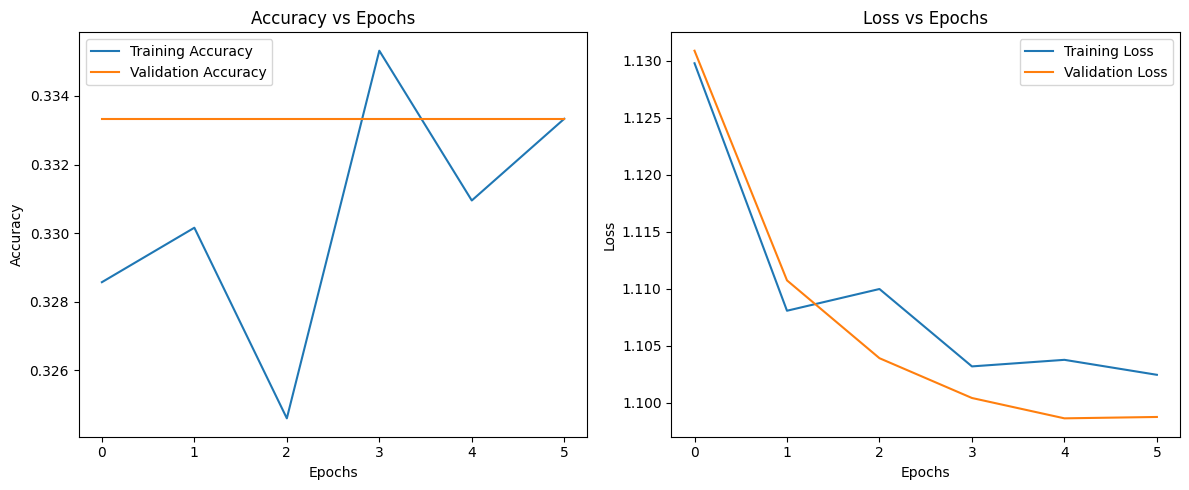

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Data Loading and Preprocessing
def load_and_preprocess_data():
    """Load and preprocess the Rock Paper Scissors dataset"""
    # Load dataset
    dataset, info = tfds.load('rock_paper_scissors', with_info=True, as_supervised=True)
    train_dataset, test_dataset = dataset['train'], dataset['test']

    # Data Augmentation
    data_augmentation = tf.keras.Sequential([
        tf.keras.layers.RandomFlip('horizontal'),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
    ])

    # Preprocessing function
    def preprocess(image, label):
        image = data_augmentation(image)  # Apply data augmentation
        image = tf.cast(image, tf.float32) / 255.0
        image = tf.image.resize(image, (224, 224))
        return image, label

    # Apply preprocessing
    train_dataset = train_dataset.map(preprocess).shuffle(1000).batch(32)
    test_dataset = test_dataset.map(preprocess).batch(32)

    # Extract the number of classes
    num_classes = info.features['label'].num_classes
    return train_dataset, test_dataset, num_classes

# Model Creation
def create_model(num_classes):
    """Create a transfer learning model using EfficientNetB0"""
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze the base model initially

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Training Function
def train_model(model, train_dataset, test_dataset, epochs=20):
    """Train the model with early stopping and learning rate reduction"""
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy', patience=5, restore_best_weights=True
    )

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1
    )

    history = model.fit(
        train_dataset,
        validation_data=test_dataset,
        epochs=epochs,
        callbacks=[early_stopping, reduce_lr]
    )
    return history

# Fine-Tuning Function
def fine_tune_model(model, train_dataset, test_dataset, epochs=10):
    """Fine-tune the model by unfreezing the base model"""
    model.layers[0].trainable = True  # Unfreeze the base model

    # Optionally freeze earlier layers
    for layer in model.layers[0].layers[:-20]:
        layer.trainable = False

    # Recompile with a lower learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        train_dataset,
        validation_data=test_dataset,
        epochs=epochs,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
            tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)
        ]
    )
    return history

# Visualize Training Metrics
def plot_training_history(history):
    """Plot training and validation accuracy/loss"""
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Load and preprocess data
    train_dataset, test_dataset, num_classes = load_and_preprocess_data()

    # Create the model
    model = create_model(num_classes)

    # Train the model
    history = train_model(model, train_dataset, test_dataset, epochs=20)

    # Visualize the training process
    plot_training_history(history)

    # Fine-tune the model
    history_finetune = fine_tune_model(model, train_dataset, test_dataset, epochs=10)

    # Visualize fine-tuning process
    plot_training_history(history_finetune)

    # Save the fine-tuned model
    model.save('rock_paper_scissors_model_finetuned.keras')


In [ ]:
# Load the saved model
model = tf.keras.models.load_model('rock_paper_scissors_model.keras')


In [ ]:
# Take one batch of images and labels from the dataset
for images, labels in test_dataset.take(1):
    # Extract a single image and its label
    single_image = images[0]  # Take the first image in the batch
    single_label = labels[0]  # Take the corresponding label

    # Make a prediction
    predicted_class, confidence = predict_gesture(model, single_image)
    print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: Rock, Confidence: 1.00


In [ ]:
import tensorflow as tf

def predict_gesture(model, image):
    """Make prediction on a single image"""
    # Preprocess image
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, (224, 224))
    image = tf.expand_dims(image, 0)

    # Make prediction
    prediction = model.predict(image)
    class_idx = np.argmax(prediction[0])
    confidence = prediction[0][class_idx]

    classes = ['Rock', 'Paper', 'Scissors']
    return classes[class_idx], confidence

In [ ]:
from tensorflow.keras.utils import img_to_array, load_img

# Load external image
image_path = '/content/rock.jpg'
external_image = load_img(image_path, target_size=(224, 224))  # Resize to match input size
external_image = img_to_array(external_image)  # Convert to numpy array

# Predict using the external image
predicted_class, confidence = predict_gesture(model, external_image)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: Rock, Confidence: 1.00


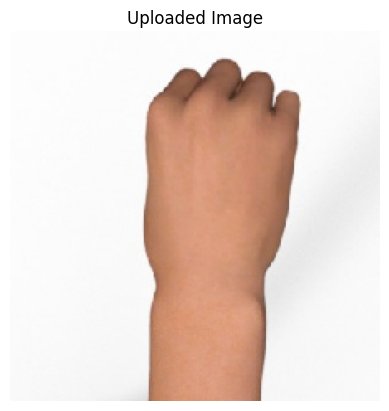

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 0, Confidence: 1.00


In [ ]:
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np

# Function to predict the gesture
def predict_gesture(model, image_array):
    # Expand dimensions to match input shape of the model
    image_array = np.expand_dims(image_array, axis=0)
    predictions = model.predict(image_array)
    predicted_class = np.argmax(predictions, axis=-1)[0]
    confidence = np.max(predictions)
    return predicted_class, confidence

# Path to the image
image_path = "/content/rock.jpg"  # Replace with your image path

try:
    # Load and preprocess the image
    external_image = load_img(image_path, target_size=(224, 224))  # Resize image to model input size
    image_array = img_to_array(external_image) / 255.0  # Normalize pixel values to [0, 1]

    # Display the image
    plt.imshow(external_image)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    # Predict the gesture (replace `model` with your trained model)
    predicted_class, confidence = predict_gesture(model, image_array)
    print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")

except FileNotFoundError:
    print(f"Image not found at path: {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")


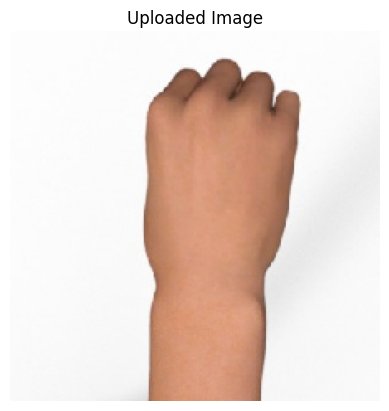

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: Rock, Confidence: 1.00


In [ ]:
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np

# Define class labels (index to name mapping)
class_labels = {0: "Rock", 1: "Paper", 2: "Scissors"}

# Function to predict the gesture
def predict_gesture(model, image_array):
    # Expand dimensions to match input shape of the model
    image_array = np.expand_dims(image_array, axis=0)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=-1)[0]
    confidence = np.max(predictions)
    predicted_class_name = class_labels[predicted_class_index]
    return predicted_class_name, confidence

# Path to the image
image_path = "/content/rock.jpg"  # Replace with your image path

try:
    # Load and preprocess the image
    external_image = load_img(image_path, target_size=(224, 224))  # Resize image to model input size
    image_array = img_to_array(external_image) / 255.0  # Normalize pixel values to [0, 1]

    # Display the image
    plt.imshow(external_image)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    # Predict the gesture (replace `model` with your trained model)
    predicted_class, confidence = predict_gesture(model, image_array)
    print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")

except FileNotFoundError:
    print(f"Image not found at path: {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")


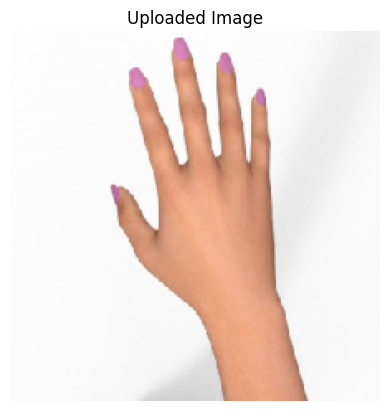

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class: Paper, Confidence: 1.00


In [ ]:
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np

# Define class labels (index to name mapping)
class_labels = {0: "Rock", 1: "Paper", 2: "Scissors"}

# Function to predict the gesture
def predict_gesture(model, image_array):
    # Expand dimensions to match input shape of the model
    image_array = np.expand_dims(image_array, axis=0)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=-1)[0]
    confidence = np.max(predictions)
    predicted_class_name = class_labels[predicted_class_index]
    return predicted_class_name, confidence

# Path to the image
image_path = "/content/paper.jpg"  # Replace with your image path

try:
    # Load and preprocess the image
    external_image = load_img(image_path, target_size=(224, 224))  # Resize image to model input size
    image_array = img_to_array(external_image) / 255.0  # Normalize pixel values to [0, 1]

    # Display the image
    plt.imshow(external_image)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    # Predict the gesture (replace `model` with your trained model)
    predicted_class, confidence = predict_gesture(model, image_array)
    print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")

except FileNotFoundError:
    print(f"Image not found at path: {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")


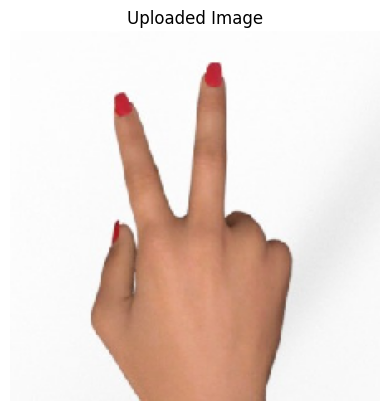

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class: Scissors, Confidence: 0.97


In [ ]:
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np

# Define class labels (index to name mapping)
class_labels = {0: "Rock", 1: "Paper", 2: "Scissors"}

# Function to predict the gesture
def predict_gesture(model, image_array):
    # Expand dimensions to match input shape of the model
    image_array = np.expand_dims(image_array, axis=0)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=-1)[0]
    confidence = np.max(predictions)
    predicted_class_name = class_labels[predicted_class_index]
    return predicted_class_name, confidence

# Path to the image
image_path = "/content/scissor.jpg"  # Replace with your image path

try:
    # Load and preprocess the image
    external_image = load_img(image_path, target_size=(224, 224))  # Resize image to model input size
    image_array = img_to_array(external_image) / 255.0  # Normalize pixel values to [0, 1]

    # Display the image
    plt.imshow(external_image)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    # Predict the gesture (replace `model` with your trained model)
    predicted_class, confidence = predict_gesture(model, image_array)
    print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")

except FileNotFoundError:
    print(f"Image not found at path: {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")
